In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#!python '/content/drive/MyDrive/MLtiverse/train.py'

In [ ]:
import pandas as pd

a = pd.read_csv('/content/drive/MyDrive/DPhi_Plants/pest_classification/train_set.csv')
a = a.dropna(axis=0)
print(a.shape)

def train_test_split(df, frac=0.1):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

train , valid = train_test_split(a, frac=0.1)

print("train size : ", train.shape)
print("valid size : ", valid.shape)


(564, 4)
train size :  (508, 4)
valid size :  (56, 4)


In [ ]:
#train.to_csv('/content/drive/MyDrive/DPhi_Plants/pest_classification/tr.csv')
#valid.to_csv('/content/drive/MyDrive/DPhi_Plants/pest_classification/v.csv')

In [ ]:
train.head(5)

,filename,label,Im_shape,Label
0,Image_1.jpg,apoderus_javanicus,"(333, 500, 3)",0
1,Image_2.jpg,apoderus_javanicus,"(333, 500, 3)",0
2,Image_3.jpg,apoderus_javanicus,"(333, 500, 3)",0
3,Image_4.jpg,apoderus_javanicus,"(333, 500, 3)",0
4,Image_5.jpg,apoderus_javanicus,"(333, 500, 3)",0


In [ ]:
valid.head(5)

,filename,label,Im_shape,Label
465,Image_466.jpeg,cisaberoptus_kenyae,"(333, 500, 3)",3
26,Image_27.jpg,apoderus_javanicus,"(333, 500, 3)",0
225,Image_226.jpg,normal,"(375, 500, 3)",11
224,Image_225.jpg,normal,"(500, 375, 3)",11
300,Image_301.jpeg,valanga_nigricornis,"(1040, 780, 3)",15


In [ ]:
data_location =  "/content/drive/MyDrive/DPhi_Plants/pest_classification"
!ls $data_location

m3_prediction_1.csv  size.csv		     training_dataset	      tr.csv
prediction_10.csv    test		     training_set.csv.gsheet  v.csv
prediction_11.csv    Testing_set.csv.gsheet  train_set.csv
Predictions	     Test_set.csv	     train_set_true.csv


In [ ]:
#reading the text data 
import pandas as pd
label_file = data_location + '/train_set.csv'
df = pd.read_csv(label_file)
print("There are {} image to label".format(len(df)))
df.head(7)

There are 564 image to label


,filename,label,Im_shape,Label
0,Image_1.jpg,apoderus_javanicus,"(333, 500, 3)",0
1,Image_2.jpg,apoderus_javanicus,"(333, 500, 3)",0
2,Image_3.jpg,apoderus_javanicus,"(333, 500, 3)",0
3,Image_4.jpg,apoderus_javanicus,"(333, 500, 3)",0
4,Image_5.jpg,apoderus_javanicus,"(333, 500, 3)",0
5,Image_6.jpg,apoderus_javanicus,"(333, 500, 3)",0
6,Image_7.jpg,apoderus_javanicus,"(333, 500, 3)",0


In [ ]:
df['label'].value_counts()

mictis_longicornis          51
dappula_tertia              46
neomelicharia_sparsa        44
normal                      44
orthaga_euadrusalis         42
apoderus_javanicus          38
cisaberoptus_kenyae         36
dialeuropora_decempuncta    36
icerya_seychellarum         34
procontarinia_matteiana     34
valanga_nigricornis         34
procontarinia_rubus         32
aulacaspis_tubercularis     24
erosomyia_sp                24
ischnaspis_longirostris     24
ceroplastes_rubens          21
Name: label, dtype: int64

In [ ]:
#del df['Unnamed: 0']


In [ ]:
#df.to_csv('/content/drive/MyDrive/DPhi_Plants/pest_classification/train_set.csv', index = False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['label'])

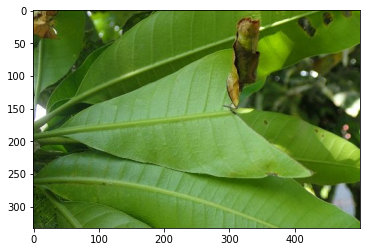

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#select any index from the whole dataset 
#single image has 5 captions
#so, select indx as: 1,6,11,16...

i = 3

image_path = data_location + "/training_dataset/"+str(df.iloc[i,0])
img=mpimg.imread(image_path)
plt.imshow(img)
plt.show()
print("label:",df.iloc[i,1])

In [ ]:
img.shape

(333, 500, 3)

Writing Custom Datasest

In [ ]:
#imports 
import os
#from collections import Counter
import torch
#from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
class Data(Dataset):
    """
    Data
    """
    def __init__(self,root_dir,label_file,transform=None,freq_threshold=1):
        self.root_dir = root_dir
        self.df = pd.read_csv(label_file)
        self.transform = transform
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df["filename"]
        self.labels = self.df["Label"]
        self.categories = self.df['label']
        
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        label = self.labels[idx]
        cat = self.categories[idx]
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,str(img_name))
        img = Image.open(img_location).convert("RGB")
        
        #apply the transfromation to the image
        if self.transform is not None:
            img = self.transform(img)
        
        
        return img, label, cat


In [ ]:
#defing the transform to be applied
transforms = T.Compose([
    T.Resize((224,224)),
    T.ToTensor()
])

In [ ]:
def show_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

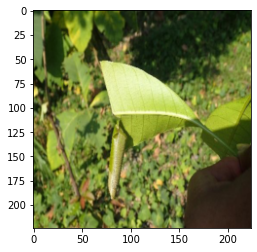

label: apoderus_javanicus


In [ ]:
#testing the dataset class
dataset =  Data(
    root_dir = data_location+"/training_dataset",
    label_file = data_location+"/train_set.csv",
    transform=transforms
)



img, label, cat = dataset[0]
show_image(img)
print("label:",cat)


In [ ]:
#writing the dataloader
#setting the constants
BATCH_SIZE = 4
NUM_WORKER = 1


data_loader = DataLoader(
    dataset=dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKER,
    shuffle=True,
    
)

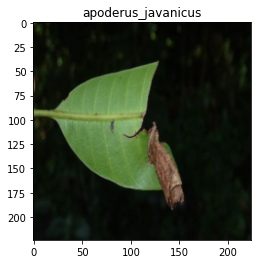

label: tensor(0)




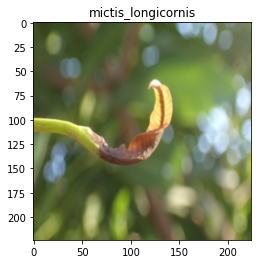

label: tensor(9)




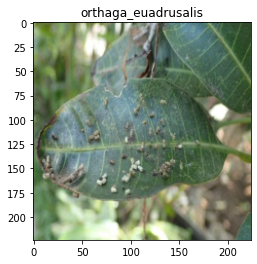

label: tensor(12)




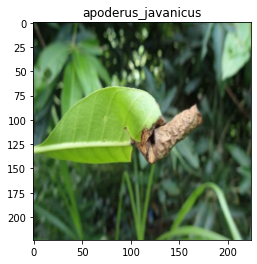

label: tensor(0)




In [ ]:
#generating the iterator from the dataloader
dataiter = iter(data_loader)

#getting the next batch
batch = next(dataiter)

#unpacking the batch
images, labels, category = batch

#showing info of image in single batch
for i in range(BATCH_SIZE):
    img,cat = images[i],category[i]                    
    show_image(img,cat)
    print('label:',labels[i])
    plt.show()
    print("\n")

In [ ]:
#imports
import numpy as np
import torch
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T



In [ ]:
#show the tensor image
import matplotlib.pyplot as plt
def show_image(img, title=None):
    """Imshow for Tensor."""
    
    #unnormalize 
    img[0] = img[0] * 0.229
    img[1] = img[1] * 0.224 
    img[2] = img[2] * 0.225 
    img[0] += 0.485 
    img[1] += 0.456 
    img[2] += 0.406
    
    img = img.numpy().transpose((1, 2, 0))
    
    
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [95]:
#Initiate the Dataset and Dataloader
#setting the constants
BATCH_SIZE = 32                  ############################################## check this
# BATCH_SIZE = 6
NUM_WORKER = 2

#defining the transform to be applied
transforms = T.Compose([
    T.Resize(226),                     
    T.RandomCrop(224),                                               
    T.RandomHorizontalFlip(p = 0.5),
    #T.RandomResizedCrop(224, scale=(0.2, 1.0)),
    T.RandomRotation(np.random.randint(5,45)),
    T.RandomVerticalFlip(p=0.5),
    T.ToTensor(),
    T.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)), 
])


#testing the dataset class
dataset = Data(
    root_dir = data_location+"/training_dataset",
    label_file = data_location+"/train_set.csv",
    transform = transforms
)

def get_data_loader(
    dataset,
    batch_size=32,
    num_workers=2,
    shuffle=True,
    pin_memory=True,
):
    dataset = dataset


    loader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=shuffle,
        pin_memory=pin_memory
    )

    return loader ### check if we need to return dataset here ###########################


#writing the dataloader
data_loader = get_data_loader(
    dataset = dataset, 
    batch_size =BATCH_SIZE,
    num_workers=NUM_WORKER,
    shuffle = True
    # batch_first=False
)

valid_dataset =  Data(
    root_dir = data_location+"/training_dataset",
    label_file = data_location+"/v.csv",
    transform = transforms
)
valid_loader  = get_data_loader(
    dataset = valid_dataset, 
    batch_size =32,
    num_workers=NUM_WORKER,
    shuffle = True
    # batch_first=False
)



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Building model

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision.models as models
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T

In [ ]:
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

class Classification_CNN(nn.Module):
    def __init__(self):
        super(Classification_CNN, self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        
        modules = list(resnet.children())[:-2]
        self.resnet = nn.Sequential(*modules)
        self.conv1  = ConvBlock(2048,1024)
        self.classifier = nn.Sequential(nn.MaxPool2d(7),
                                       nn.Flatten(),
                                       nn.Linear(1024, 512),
                                       nn.Dropout(0.1),
                                       nn.LeakyReLU(),
                                       nn.Linear(512,256),
                                       nn.Dropout(0.1),
                                       nn.LeakyReLU(),
                                       nn.Linear(256,64),
                                       nn.Dropout(0.2),
                                       nn.LeakyReLU(),
                                       nn.Linear(64,16))
        

    def forward(self, images):
        features = self.resnet(images)   #(batch_size,2048,7,7)
        features = self.conv1(features)
        output   = self.classifier(features)                                    
        
                
        #print("features shape: ", features.shape)
        return output

In [ ]:
class Classification_SN(nn.Module):
    def __init__(self):
        super(Classification_SN, self).__init__()
        sn = models.squeezenet1_0(pretrained = True)
        for param in sn.parameters():
            param.requires_grad_(False)
        
        modules = list(sn.children())[:-1]
        self.snet = nn.Sequential(*modules)
        self.classifier = nn.Sequential(nn.Dropout(p=0.5, inplace=False),
                                        nn.Conv2d(512, 16, kernel_size=(1, 1), stride=(1, 1)),
                                        nn.ReLU(inplace=True),
                                        nn.AdaptiveAvgPool2d(output_size=(1, 1)),
                                        nn.Flatten()
                                        )
        

    def forward(self, images):
        features = self.snet(images)   #(batch_size,2048,7,7)
        output   = self.classifier(features)                                    
        
                
        #print("features shape: ", features.shape)
        return output

In [ ]:

model3 = models.mobilenet_v2(pretrained=True )
model3.classifier[1] = nn.Sequential(
                                       nn.Linear(model3.last_channel, 512),
                                       nn.Dropout(0.1),
                                       nn.LeakyReLU(),
                                       nn.Linear(512,256),
                                       nn.Dropout(0.1),
                                       nn.LeakyReLU(),
                                       nn.Linear(256,64),
                                       nn.Dropout(0.2),
                                       nn.LeakyReLU(),
                                       nn.Linear(64,16))
       

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [72]:
class MyEnsemble(nn.Module):
    def __init__(self, modelA, modelB):
        super(MyEnsemble, self).__init__()
        for param in modelA.parameters():
            param.requires_grad_(False)
        for param in modelB.parameters():
            param.requires_grad_(False)

        self.modelA = modelA
        self.modelB = modelB
        self.classifier = nn.Sequential(
                                          nn.Linear(32,32),
                                          nn.LeakyReLU(),
                                          nn.Linear(32,16),
                                          nn.LeakyReLU(),
                                          nn.Linear(16,16)
                                          )
        
    def forward(self, X):
        x1 = self.modelA(X)
        x1 = torch.log_softmax(x1, dim = 1)
        x2 = self.modelB(X)
        x2 =torch.log_softmax(x2, dim = 1)
        x = torch.cat((x1, x2), dim=1)
        x = self.classifier(x)
        return x







In [73]:
    '''
    def forward(self, x1, x2):
        x1 = self.modelA(x1)
        x2 = self.modelB(x2)
        x = torch.cat((x1, x2), dim=1)
        x = self.classifier(x)
        return x
      '''

'\ndef forward(self, x1, x2):\n    x1 = self.modelA(x1)\n    x2 = self.modelB(x2)\n    x = torch.cat((x1, x2), dim=1)\n    x = self.classifier(x)\n    return x\n  '

In [77]:
model1 = Classification_CNN().to(device)
model2 = Classification_SN().to(device)

In [122]:
checkpoint1 = torch.load('/content/drive/MyDrive/DPhi_Plants/state.pth')
model1.load_state_dict(checkpoint1["state_dict"])

checkpoint2 = torch.load('/content/drive/MyDrive/DPhi_Plants/sn_state.pth')
model2.load_state_dict(checkpoint2["state_dict"])


<All keys matched successfully>

In [124]:
#init model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_ensemb = MyEnsemble(model1, model2).to(device)
learning_rate = 3e-5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ensemb.parameters(), lr=learning_rate)

In [125]:
from torchsummary import summary   

INPUT_SHAPE = (3, 256, 256)
#print(summary(model_ensemb.cuda(), (INPUT_SHAPE)))

In [126]:
#helper function to save the model
def save_model(model,num_epochs):
    model_state = {
        'num_epochs':num_epochs,
        'state_dict':model.state_dict()
    }

    torch.save(model_state,'/content/drive/MyDrive/DPhi_Plants/ensemb_state.pth')
    

In [127]:
checkpoint3 = torch.load('/content/drive/MyDrive/DPhi_Plants/ensemb_state.pth')
model_ensemb.load_state_dict(checkpoint3["state_dict"])

<All keys matched successfully>

In [129]:

num_epochs = 150
print_every = 10

for epoch in range(1,num_epochs+1):   
    for idx, (image,labels,cat) in enumerate(iter(data_loader)):
        image,labels = image.to(device),labels.to(device)

        # Zero the gradients.
        optimizer.zero_grad()

        # Feed forward
        outputs= model_ensemb(image)

        # Calculate the batch loss.
        targets = labels
        loss = criterion(outputs, targets)
        
        # Backward pass.
        loss.backward()

        # Update the parameters in the optimizer.
        optimizer.step()

        if (idx+1)%print_every == 0:
            
            #generate the caption
            model_ensemb.eval()
            with torch.no_grad():
                dataiter = iter(valid_loader)
                img,lab,cat = next(dataiter)
                lab = lab.to(device)
                prediction = model_ensemb(img.to(device))
                prediction = torch.log_softmax(prediction, dim = 1)
                _, prediction = torch.max(prediction, dim = 1) 
                val_acc = torch.tensor(torch.sum(prediction == lab).item() / len(prediction))
                prediction = label_encoder.inverse_transform(prediction.detach().cpu())
                #show_image(img[0],title=prediction[0])
                val_loss = criterion(model_ensemb(img.to(device)), lab)
                
                
                model_ensemb.train()
            print("Epoch: [{}] train_loss: {:.5f}, val_loss: {:.5f}, val_acc: {:.5f} ".format(epoch,loss.item(),val_loss.item(), val_acc.item()))
            #print("Epoch: {} loss: {:.5f}".format(epoch,loss.item()))
            #print('\n')
        #print('Val loss :', val_loss)
        #print('tain_loss:', loss)
                
            
        
    #save the latest model
    save_model(model_ensemb,epoch)


Epoch: [1] train_loss: 0.07831, val_loss: 0.09988, val_acc: 1.00000 
Epoch: [2] train_loss: 0.15843, val_loss: 0.27098, val_acc: 0.93750 
Epoch: [3] train_loss: 0.08101, val_loss: 0.23935, val_acc: 0.96875 
Epoch: [4] train_loss: 0.12078, val_loss: 0.11834, val_acc: 0.96875 
Epoch: [5] train_loss: 0.13815, val_loss: 0.28199, val_acc: 0.90625 
Epoch: [6] train_loss: 0.16853, val_loss: 0.30018, val_acc: 0.87500 
Epoch: [7] train_loss: 0.23886, val_loss: 0.09052, val_acc: 1.00000 
Epoch: [8] train_loss: 0.17421, val_loss: 0.16774, val_acc: 0.96875 
Epoch: [9] train_loss: 0.06586, val_loss: 0.18839, val_acc: 0.93750 
Epoch: [10] train_loss: 0.13637, val_loss: 0.18953, val_acc: 0.93750 
Epoch: [11] train_loss: 0.10383, val_loss: 0.15991, val_acc: 0.96875 
Epoch: [12] train_loss: 0.16780, val_loss: 0.25983, val_acc: 0.90625 
Epoch: [13] train_loss: 0.03717, val_loss: 0.13114, val_acc: 1.00000 
Epoch: [14] train_loss: 0.07499, val_loss: 0.16341, val_acc: 0.96875 
Epoch: [15] train_loss: 0.112

In [111]:
class Test_Data(Dataset):
    """
    Test_Data
    """
    def __init__(self,root_dir,label_file,transform=None,freq_threshold=1):
        self.root_dir = root_dir
        self.df = pd.read_csv(label_file)
        self.transform = transform
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df["filename"]
        
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,str(img_name))
        img = Image.open(img_location).convert("RGB")
        
        #apply the transfromation to the image
        if self.transform is not None:
            img = self.transform(img)
        
        
        return img

In [112]:
transforms_test = T.Compose([
    T.Resize(226),                     
    T.RandomCrop(224),                                        
    T.ToTensor(),
    T.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)), 
])

test_dataset = Test_Data(
    root_dir = data_location+"/test",
    label_file = data_location+"/Test_set.csv",
    transform = transforms_test
)

test_loader = get_data_loader(
    dataset = test_dataset, 
    batch_size =256,
    num_workers=2,
    shuffle = False
    # batch_first=False
)



In [113]:
#Testing
y_pred_list = []
with torch.no_grad():
    model_ensemb.eval()
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model_ensemb(X_batch)
        y_test_pred = torch.log_softmax(y_test_pred, dim = 1)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_tags = label_encoder.inverse_transform(y_pred_tags.detach().cpu())
        y_pred_list.append(y_pred_tags)
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [114]:
pred = []
for i in y_pred_list:
    for j in i:
        pred.append(j)
 

In [115]:
len(pred)

13950

In [116]:
test_df = pd.read_csv('/content/drive/MyDrive/DPhi_Plants/pest_classification/Test_set.csv')
test_df['label'] = pred
test_df.to_csv("/content/drive/MyDrive/DPhi_Plants/pest_classification/ensemb_prediction_2.csv")

In [ ]:
test_df.head(5)

,filename,label
0,Image_1.jpg,dappula_tertia
1,Image_2.jpg,dappula_tertia
2,Image_3.jpg,mictis_longicornis
3,Image_4.jpg,dappula_tertia
4,Image_5.jpg,dappula_tertia


Checking


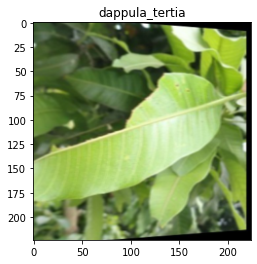

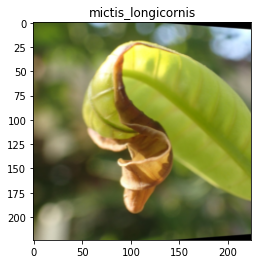

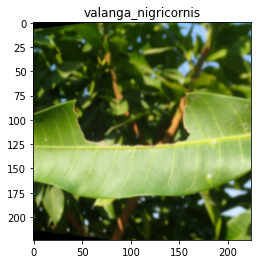

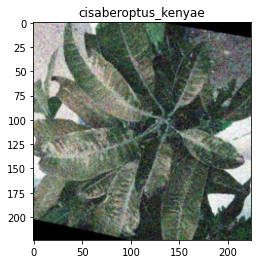

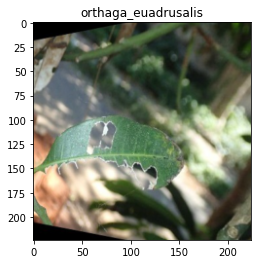

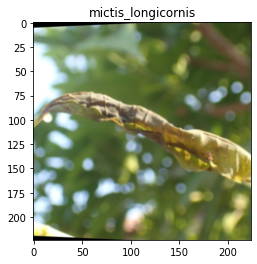

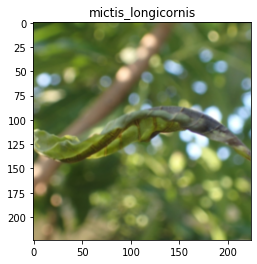

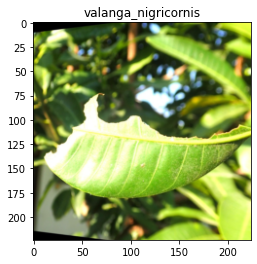

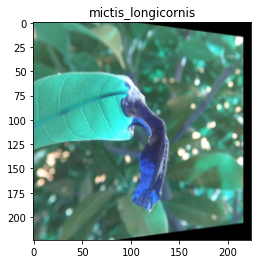

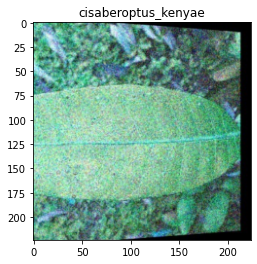

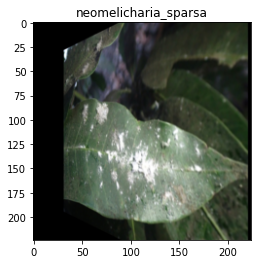

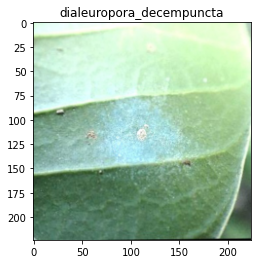

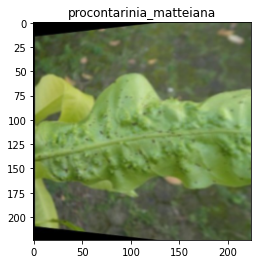

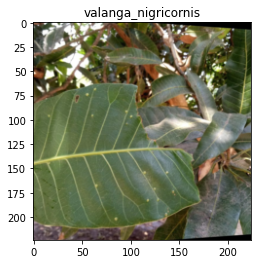

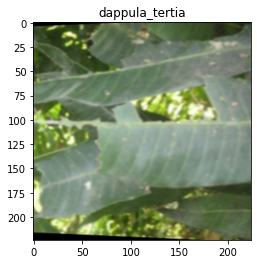

KeyboardInterrupt: ignored

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/DPhi_Plants/pest_classification/Test_set.csv')
i = 0 
model_ensemb.eval()
for id in test_df['filename']:
  img = transforms(Image.open(data_location+ "/test/"+ str(id)).convert("RGB")).unsqueeze(0)    
  y_test_pred = model_ensemb(img[0:1].to(device))
  y_test_pred = torch.log_softmax(y_test_pred, dim = 1)
  _, y_pred_tags = torch.max(y_test_pred, dim = 1)
  y_pred_tags = label_encoder.inverse_transform(y_pred_tags.detach().cpu())
  if i % 100 == 0: 
    show_image(img[0],title=y_pred_tags[0])
  i = i+1